# Création du brief Nuage Compta

## 1- Gestion des imports

In [210]:
%load_ext autoreload
%autoreload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint, Callback
import imutils
from imutils.contours import sort_contours

import methods
from methods import Methods
# from methods import Methods
# from methods.Methods import get_result
# from methods.methods import negatif
# import tensorflow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Paramètres de l'application

In [221]:
# Filename of the model weights output
modele_best = "cnn_best.hdf5"
modele_final = "cnn_final.hdf5"

DATA_ROOT = 'data/'
MODELES_PATH = 'data/modeles/'
TRAINING_PATH = 'training/'
TESTING_PATH = 'testing/'
ABC_PATH = 'data/alphbet-dataset/'

batch_size = 5975
num_classes = 27
epochs = 25

# input image dimensions
# img_rows, img_cols = 28, 28
img_size = 28
input_shape = (img_size, img_size, 1)

In [222]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = "data/training",
    target_size = (img_size,img_size),
    batch_size = 200,
    class_mode = "categorical",
    color_mode = "grayscale"                                


)

test_generator = test_datagen.flow_from_directory(
    directory = "data/testing",
    target_size = (img_size,img_size),
    batch_size = 100,
    class_mode = "categorical",
    color_mode = "grayscale"

)

Found 5205 images belonging to 27 classes.
Found 784 images belonging to 27 classes.


In [223]:
model = Sequential()

model.add(Conv2D(img_size, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape
                 ))

model.add(Conv2D(img_size, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.summary()

checkpointer = ModelCheckpoint(filepath= MODELES_PATH + modele_best, verbose=1, save_best_only=False)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 28)        7084      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 28)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 12, 12, 28)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4032)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               516224    
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)             

In [224]:
model.fit(train_generator,
        #   batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(test_generator), 
          callbacks=[checkpointer]
          )

score = model.evaluate(train_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Saving model...")
model.save(MODELES_PATH + modele_final)
print("All done !")

Epoch 1/25
27/27 [==============================] - 13s 484ms/step - loss: 2.8064 - accuracy: 0.1879 - val_loss: 3.5875 - val_accuracy: 0.1901

Epoch 00001: saving model to data/modeles/cnn_best.hdf5
Epoch 2/25
27/27 [==============================] - 13s 463ms/step - loss: 2.2039 - accuracy: 0.3691 - val_loss: 1.3772 - val_accuracy: 0.5918

Epoch 00002: saving model to data/modeles/cnn_best.hdf5
Epoch 3/25
27/27 [==============================] - 13s 499ms/step - loss: 1.7481 - accuracy: 0.4738 - val_loss: 1.1248 - val_accuracy: 0.6352

Epoch 00003: saving model to data/modeles/cnn_best.hdf5
Epoch 4/25
27/27 [==============================] - 13s 478ms/step - loss: 1.5175 - accuracy: 0.5314 - val_loss: 0.9212 - val_accuracy: 0.6901

Epoch 00004: saving model to data/modeles/cnn_best.hdf5
Epoch 5/25
27/27 [==============================] - 14s 529ms/step - loss: 1.3213 - accuracy: 0.5869 - val_loss: 0.8334 - val_accuracy: 0.7270

Epoch 00005: saving model to data/modeles/cnn_best.hdf5


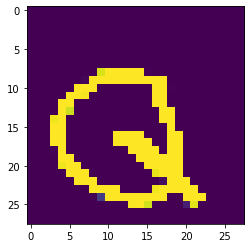

In [225]:
image_loaded = r'data/image-test.png'
test_image = image.load_img(image_loaded, target_size = (img_size,img_size), color_mode="grayscale")
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)




In [226]:
resultat = model.predict_proba(test_image)
lettre = Methods.get_result(resultat)
# score_test = model.evaluate(resultat, verbose=0)

print (resultat)
# print(np.argmax(resultat, axis=1))
print(lettre)

# test_result = model.predict_proba(self, test_image)

# make a prediction
# ynew = model.predict(Xnew)
# # show the inputs and predicted outputs
# for i in range(len(test_image)):
# 	print("X=%s, Predicted=%s" % (test_image[i], resultat[i]))

# print(f"La lettre correspondante est: {resultat}")

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0.]]
Q


In [227]:
chars = []

img = cv2.imread(DATA_ROOT +'imagedentrainement.jpeg')

#Convert to gray scale et blur
img_blur = cv2.GaussianBlur(img, (9, 9), 1)
gray = cv2.cvtColor(img_blur, cv2.COLOR_BGR2GRAY)

cv2.imwrite(DATA_ROOT +'imagedentrainement_gray.jpeg', gray)

# On applique le filtre pour passer l'image en blanc sur fond noir
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV) 
cv2.imwrite(DATA_ROOT + "threshold.jpeg", threshold)

vis = threshold.copy()

contours = cv2.findContours(vis, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

roi_index = 0

# Détection des ROI
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)

    if w < 50 and h < 50:
        continue


    roi = vis[y:y+h, x:x+w]
    cv2.imwrite(DATA_ROOT + '/extract/region_{}.jpeg'.format(roi_index), roi)


    if w > h:
        r_img = imutils.resize(roi, width=20)
    else:
        r_img = imutils.resize(roi, height=20)

    cv2.imwrite(DATA_ROOT + '/extract/region_resize_{}.jpeg'.format(roi_index), r_img)


    # Ajout du padding de 4
    p_img= cv2.copyMakeBorder(r_img.copy(),4,4,4,4,cv2.BORDER_CONSTANT)
    p_img = cv2.resize(p_img, (28, 28))

    cv2.imwrite(DATA_ROOT + '/extract/region_padded_{}.jpeg'.format(roi_index), p_img)

    p_img = p_img.astype("float32") / 255.0
    p_img = np.expand_dims(p_img, axis=-1)
    chars.append((p_img, (x, y, w, h)))

    roi_index += 1



In [228]:
model = load_model(MODELES_PATH + modele_final)

In [229]:
boxes = [b[1] for b in chars]
chars = np.array([c[0] for c in chars], dtype="float32")


# Application du modèle entraîné sur les RoI

preds = model.predict(chars)

labelNames = "ABCDEFGHIJKLMNOPQRSTUVWXYZ♡"
labelNames = [l for l in labelNames]


for (pred, (x, y, w, h)) in zip(preds, boxes):
    i = np.argmax(pred)
    prob = pred[i]
    label = labelNames[i]
    
    # Création de l'image de prediction
    print("[INFO] {} - {:.2f}%".format(label, prob * 100))
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(img, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255, 0, 0), 2)

[INFO] Q - 33.44%
[INFO] O - 66.65%
[INFO] R - 93.83%
[INFO] S - 29.08%
[INFO] A - 97.95%
[INFO] M - 97.35%
[INFO] Q - 50.90%
[INFO] T - 99.74%
[INFO] F - 99.31%
[INFO] N - 87.97%
[INFO] A - 78.39%
[INFO] D - 91.12%
[INFO] A - 99.64%
[INFO] R - 23.05%
[INFO] T - 96.23%
[INFO] A - 98.54%


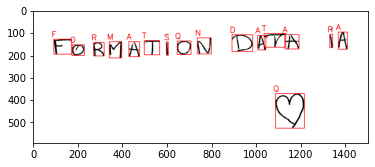

In [230]:
plt.imshow(img)